### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [163]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv(r'/Users/christospieris/Documents/LSE Data Analytics/Course 3/turtle_reviews.csv')

# View the DataFrame.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [4]:
# Any missing values?
print(reviews.isnull().sum())

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [ ]:
# Explore the data.


In [22]:
# Descriptive statistics.

reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')

## 2. Drop columns

In [23]:
# Drop unnecessary columns such as language and platform which hold the same value across rows

reviews = reviews.drop(['language','platform'], axis = 1)


# View column names.

reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [24]:
# Rename the column headers.
new_column_headers = ['Gender','Age','Income','Spend',
                      'Loyalty','Education','Product',
                     'Review','Summary']
reviews.columns = new_column_headers
# View column names.
reviews.columns

Index(['Gender', 'Age', 'Income', 'Spend', 'Loyalty', 'Education', 'Product',
       'Review', 'Summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [27]:
# Create a CSV file as output.

reviews.to_csv('/Users/christospieris/Documents/LSE Data Analytics/Course 3/turtle_reviews_updated.csv')


In [33]:
# Import new CSV file with Pandas.
reviews_updated = pd.read_csv('/Users/christospieris/Documents/LSE Data Analytics/Course 3/turtle_reviews_updated.csv')

# View DataFrame.
reviews_updated.shape
reviews_updated
revs = reviews_updated
revs

,Unnamed: 0,Gender,Age,Income,Spend,Loyalty,Education,Product,Review,Summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...
1995,1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 5. Linear regression

Use linear regression or multiple linear regression and the statsmodels functions to evaluate possible linear relationships between loyalty points and age/remuneration/spending scores to determine whether these can be used to predict the loyalty points.

### 5a) spending vs loyalty

In [37]:
# Independent variable.
y = revs['Loyalty']
# Dependent variable.
x = revs['Spend']

# OLS model and summary.
f = 'y ~ x'
lab = ols(f, data = revs).fit()
lab.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        18:11:41   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Extract the estimated parameters
est = lab.params
print(est)
# Extract the standard errors.
err = lab.bse
print(err)
# Extract the predicted values.
predicted = lab.predict()
print(predicted)

Intercept   -75.052663
x            33.061693
dtype: float64
Intercept    45.930554
x             0.814419
dtype: float64
[1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [47]:
# Set the X coefficient and the constant to generate the regression table.
x_co = est[1]
inter = est[0]
y_predicted = inter + x_co * x

# View the output.
y_predicted

0       1214.353374
1       2602.944491
2        123.317497
3       2470.697718
4       1247.415067
           ...     
1995    2206.204172
1996     189.440883
1997    2933.561424
1998     453.934429
1999     189.440883
Name: Spend, Length: 2000, dtype: float64

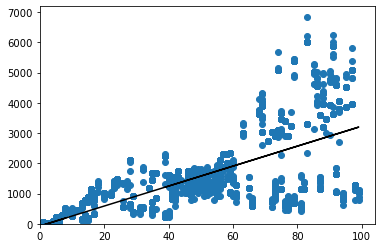

In [49]:
# Plot the graph with a regression line.

plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_predicted, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

In [50]:
# Independent variable.
x = revs['Income']
# Dependent variable.
y = revs['Loyalty']
# OLS model and summary.
f = 'y ~ x'
lab = ols(f, data = revs).fit()
lab.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        18:27:46   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Extract the estimated parameters
est = lab.params
print(est)
# Extract the standard errors.
err = lab.bse
print(err)
# Extract the predicted values.
predicted = lab.predict()
print(predicted)

Intercept   -65.686513
x            34.187825
dtype: float64
Intercept    52.170717
x             0.977925
dtype: float64
[ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [52]:
# Set the X coefficient and the constant to generate the regression table.
x_co = est[1]
inter = est[0]
y_predicted = inter + x_co * x

# View the output.
y_predicted

0        354.823741
1        354.823741
2        382.857758
3        382.857758
4        410.891774
           ...     
1995    2821.817228
1996    3102.157397
1997    3102.157397
1998    3298.395515
1999    3102.157397
Name: Income, Length: 2000, dtype: float64

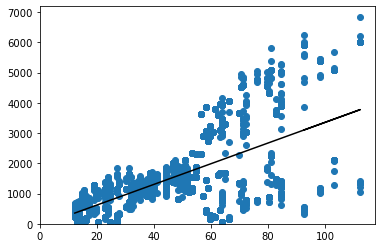

In [53]:
# Plot the graph with a regression line.

plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_predicted, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5c) age vs loyalty

In [54]:
# Independent variable.
x = revs['Age']
# Dependent variable.
y = revs['Loyalty']
# OLS model and summary.
f = 'y ~ x'
lab = ols(f, data = revs).fit()
lab.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Wed, 21 Dec 2022   Prob (F-statistic):             0.0577
Time:                        18:29:48   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Extract the estimated parameters
est = lab.params
print(est)
# Extract the standard errors.
err = lab.bse
print(err)
# Extract the predicted values.
predicted = lab.predict()
print(predicted)

Intercept    1736.517739
x              -4.012805
dtype: float64
Intercept    88.248731
x             2.113177
dtype: float64
[1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [56]:
# Set the X coefficient and the constant to generate the regression table.
x_co = est[1]
inter = est[0]
y_predicted = inter + x_co * x
# View the output.
y_predicted

0       1664.287247
1       1644.223221
2       1648.236026
3       1636.197611
4       1604.095169
           ...     
1995    1588.043949
1996    1563.967118
1997    1600.082364
1998    1600.082364
1999    1608.107975
Name: Age, Length: 2000, dtype: float64

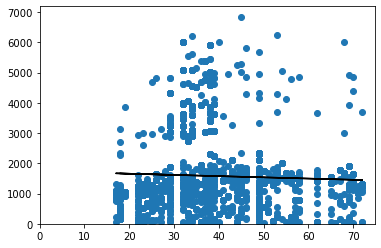

In [57]:
# Plot the graph with a regression line.

plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_predicted, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

## 6. Observations and insights

***Your observations here...***






# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [58]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [70]:
# Load the CSV file(s) as df2.
imp = pd.read_csv(r'/Users/christospieris/Documents/LSE Data Analytics/Course 3/turtle_reviews_updated.csv')
df2 = imp[['Income','Spend']]
# View DataFrame.
df2

,Income,Spend
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [ ]:
# Explore the data.


In [ ]:
# Descriptive statistics.


## 2. Plot

<AxesSubplot:xlabel='Income', ylabel='Spend'>

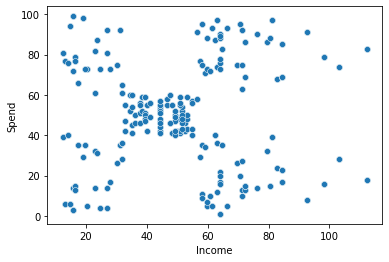

In [72]:
# Create a scatterplot with Seaborn.
sns.scatterplot(data = df2, x = 'Income', y = 'Spend')

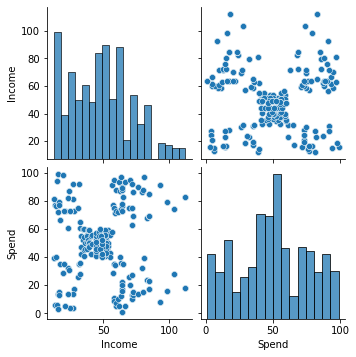

In [73]:
# Create a pairplot with Seaborn.
sns.pairplot(df2)

## 3. Elbow and silhoutte methods

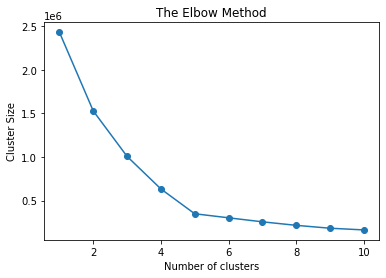

In [74]:
# Determine the number of clusters: Elbow method.
clustersize = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(df2)
    clustersize.append(kmeans.inertia_)

plt.plot(range(1, 11),
         clustersize,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Cluster Size")

plt.show()

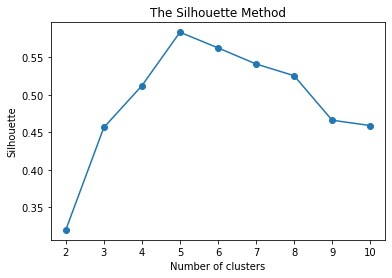

In [76]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette")

plt.show()

## 4. Evaluate k-means model at different values of *k*

1    1293
2     356
0     351
Name: K-Means Predicted, dtype: int64

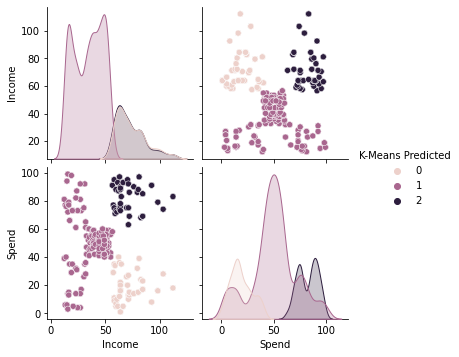

In [82]:
# Use 3 clusters:
kmeans = KMeans(n_clusters = 3,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

1    1013
2     356
0     351
3     280
Name: K-Means Predicted, dtype: int64

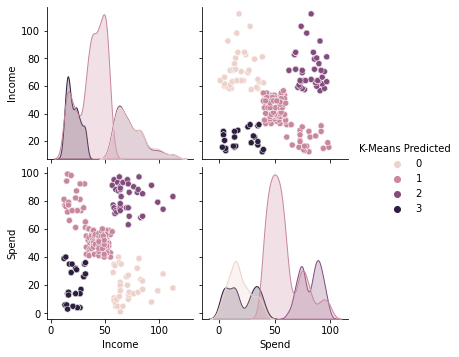

In [81]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

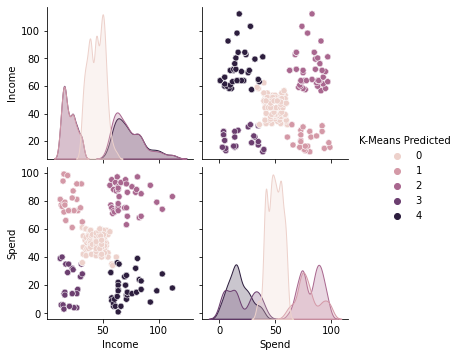

In [83]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

## 5. Fit final model and justify your choice

In [ ]:
# Apply the final model.


In [ ]:
# Check the number of observations per predicted class.


## 6. Plot and interpret the clusters

In [ ]:
# Visualising the clusters.


# View the DataFrame.


In [ ]:
# Visualising the clusters.



## 7. Discuss: Insights and observations

***Your observations here...***

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [1]:
!pip install nltk

In [2]:
!pip install wordcloud

In [3]:
!pip install textblob

     |████████████████████████████████| 636 kB 1.9 MB/s eta 0:00:01


In [43]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download ('punkt')
nltk.download ('stopwords')


from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/christospieris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christospieris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Load the data set as df3.
imp3 = pd.read_csv(r'/Users/christospieris/Documents/LSE Data Analytics/Course 3/turtle_reviews_updated.csv')

# View DataFrame.
imp3


,Unnamed: 0,Gender,Age,Income,Spend,Loyalty,Education,Product,Review,Summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...
1995,1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [7]:
# Explore data set.
imp3.describe

<bound method NDFrame.describe of       Unnamed: 0  Gender  Age  Income  Spend  Loyalty Education  Product  \
0              0    Male   18   12.30     39      210  graduate      453   
1              1    Male   23   12.30     81      524  graduate      466   
2              2  Female   22   13.12      6       40  graduate      254   
3              3  Female   25   13.12     77      562  graduate      263   
4              4  Female   33   13.94     40      366  graduate      291   
...          ...     ...  ...     ...    ...      ...       ...      ...   
1995        1995  Female   37   84.46     69     4031       PhD      977   
1996        1996  Female   43   92.66      8      539       PhD      979   
1997        1997    Male   34   92.66     91     5614  graduate     1012   
1998        1998    Male   34   98.40     16     1048       PhD     1031   
1999        1999    Male   32   92.66      8      479       PhD      453   

                                                 Revi

In [15]:
# Keep necessary columns. Drop unnecessary columns.
df3 = imp3[['Review','Summary']]

# View DataFrame.
df3

,Review,Summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [16]:
# Drop any rows with any missing values.
df3 = df3.dropna(axis=0)
df3

,Review,Summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [18]:
# Review: Change all to lower case and join with a space.
# Transform 'Review' column to lowercase.
df3['Review'] = df3['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# Preview the 'Review'column.
df3['Review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: Review, dtype: object

In [19]:
# Summary: Change all to lower case and join with a space.
# Transform 'Review' column to lowercase.
df3['Summary'] = df3['Summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# Preview the 'Review'column.
df3['Summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: Summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [20]:
# Remove punctuation in Review column.
df3['Review'] = df3['Review'].str.replace('[^\w\s]','')
# Preview the result.
df3['Review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: Review, dtype: object

In [21]:
# Remove punctuation in Summary column.
df3['Summary'] = df3['Summary'].str.replace('[^\w\s]','')
# Preview the result.
df3['Summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: Summary, dtype: object

### 2c) Drop duplicates in both columns

In [35]:
# Check the number of duplicate values in the Review column.
print(df3.Review.duplicated().sum())
# Check the number of duplicate values in the Summary column.
print(df3.Summary.duplicated().sum())
# Drop duplicates in both columns.
df4 = df3.drop_duplicates(subset=['Review']).reset_index(drop = True)
df5 = df4.drop_duplicates(subset=['Summary']).reset_index(drop = True)
# View DataFrame.
# Check the number of duplicate values in the Review column.
print(df5.Review.duplicated().sum())
# Check the number of duplicate values in the Summary column.
print(df5.Summary.duplicated().sum())
df5

50
649
0
0


,Review,Summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1344,this is a fun card game for people who like wo...,this is a fun card game for people who like words
1345,fun for the family just make certain you agree...,sort of a card game equivalent of scrabble and...
1346,great game to keep the mind active we play it ...,great game to keep the mind active
1347,we are retired and find this a great way to st...,a great mind game


## 3. Tokenise and create wordclouds

In [37]:
# Create new DataFrame (copy DataFrame).
df6=df5
# View DataFrame.
df6

,Review,Summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1344,this is a fun card game for people who like wo...,this is a fun card game for people who like words
1345,fun for the family just make certain you agree...,sort of a card game equivalent of scrabble and...
1346,great game to keep the mind active we play it ...,great game to keep the mind active
1347,we are retired and find this a great way to st...,a great mind game


In [129]:
# Apply tokenisation to both columns.
df6['review_tokens'] = df6['Review'].apply(word_tokenize)
df6['summary_tokens'] = df6['Summary'].apply(word_tokenize)
df6.head()
# Create empty lists for each column.
review_token_list = []
summary_token_list = []
# Generate token lists for each column.
for i in range(df6.shape[0]):
    # Add each token to the list.
    review_token_list = review_token_list + df6['review_tokens'][i]
    summary_token_list = summary_token_list +df6['summary_tokens'][i]



In [ ]:
# Create variables holding the entire text of each column
all_reviews = ''
all_summary = ''
for i in range(df6.shape[0]):
    all_reviews = all_reviews + df6['Review'][i]
    all_summary = all_summary + df6['Summary'][i]
# View Variables.
all_reviews
all_summary

In [46]:
# Review: Create a word cloud.

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_review1 = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews) 

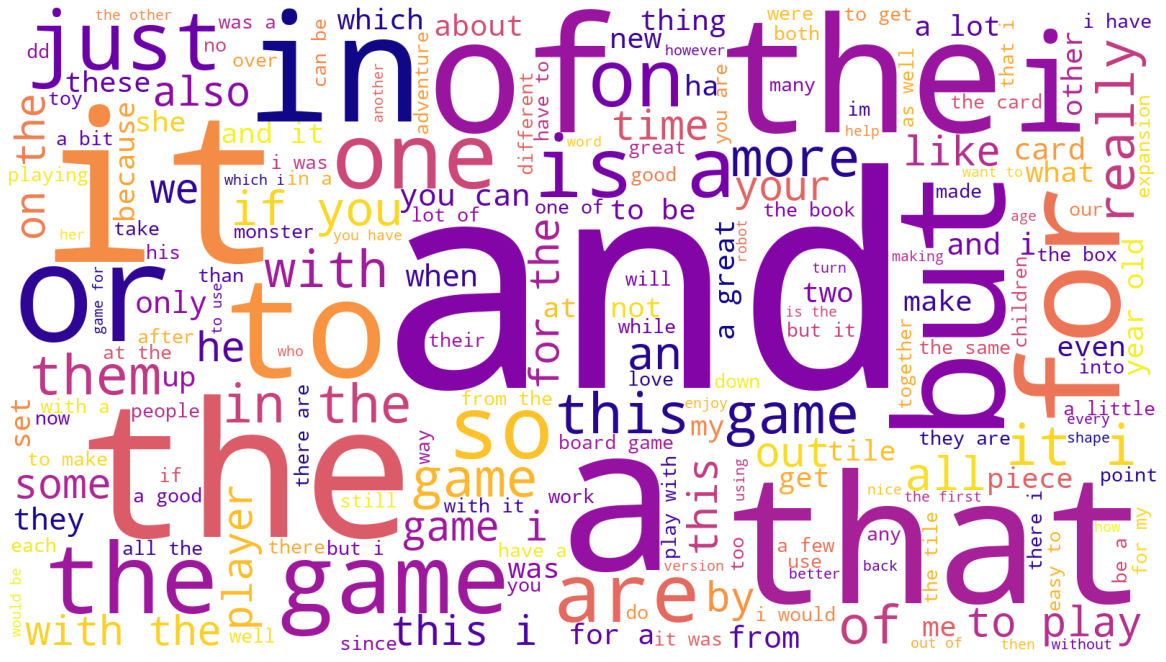

In [47]:
# Review: Plot the WordCloud image.
                  
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_review1) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()



In [49]:
# Summary: Create a word cloud.

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_summary1 = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary) 

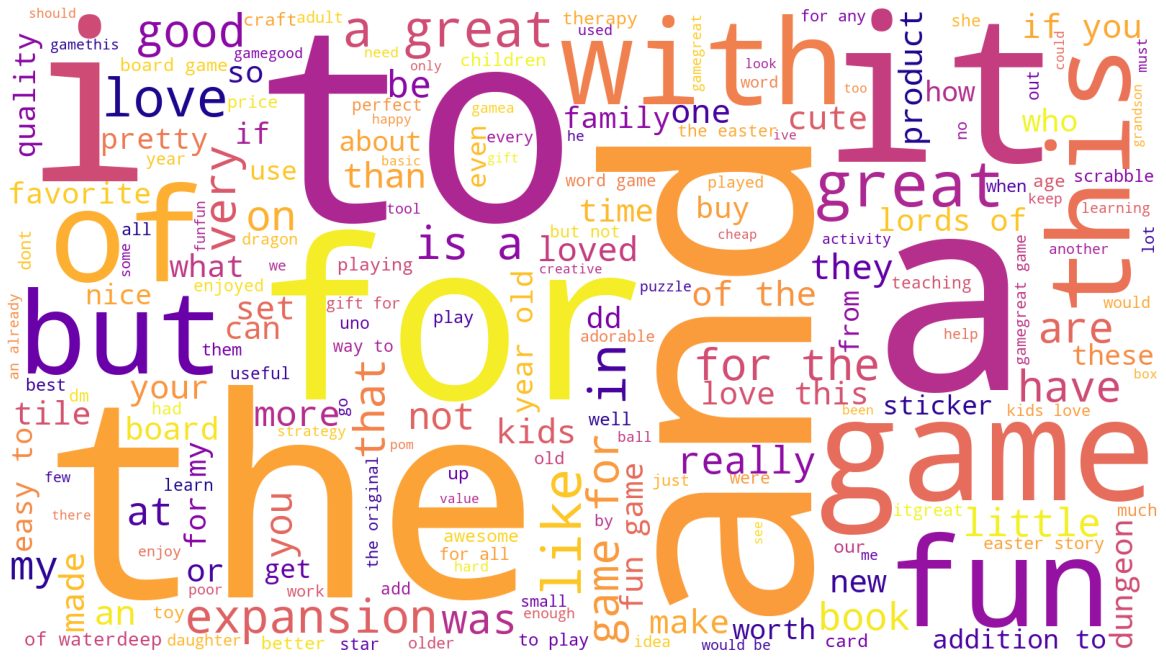

In [50]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_summary1) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [64]:
# Calculate the frequency distribution for text in Review column
fdist_review = FreqDist(review_token_list)
fdist_summary = FreqDist(summary_token_list)
# Preview data.
fdist_summary,fdist_review

(FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 236, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...}),
 FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...}))

### 4b) Remove alphanumeric characters and stopwords

In [70]:
# Delete all the alpanum.
review_tokens = [word for word in review_token_list if word.isalnum()]
summary_tokens = [word for word in summary_token_list if word.isalnum()]

In [75]:
# Remove all the stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
filtered_review_tokens = [x for x in review_tokens if x.lower() not in english_stopwords]
filtered_summary_tokens = [y for y in summary_tokens if y.lower() not in english_stopwords]
# Define an empty string variable.
review_token_string = ''
summary_token_string = ''
for value in filtered_review_tokens:
    # Add each filtered token word to the string.
    review_token_string = review_token_string + value + ' '
for value in filtered_summary_tokens:
    # Add each filtered token word to the string.
    summary_token_string = summary_token_string + value + ' '

### 4c) Create wordcloud without stopwords

In [77]:
# Create a wordcloud without stop words.
# Set the colour palette.
sns.set(color_codes=True)
# Review: Create a word cloud.
word_cloud_review2 = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(review_token_string) 
# Summary: Create a word cloud.
word_cloud_summary2 = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(summary_token_string) 

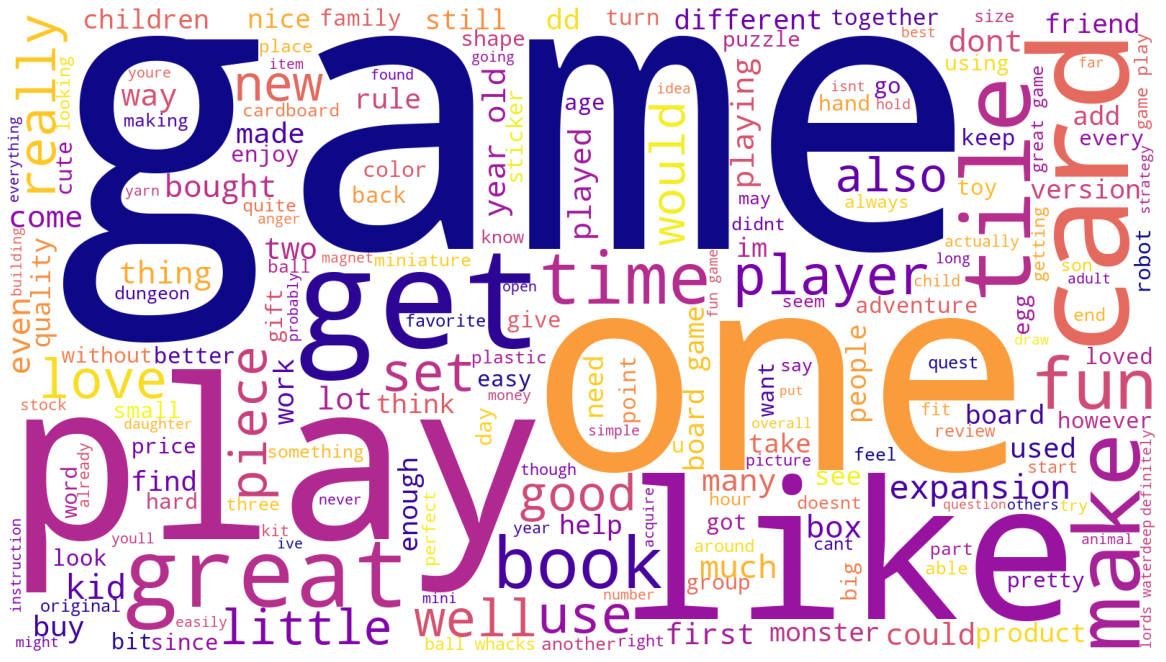

In [78]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_review2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

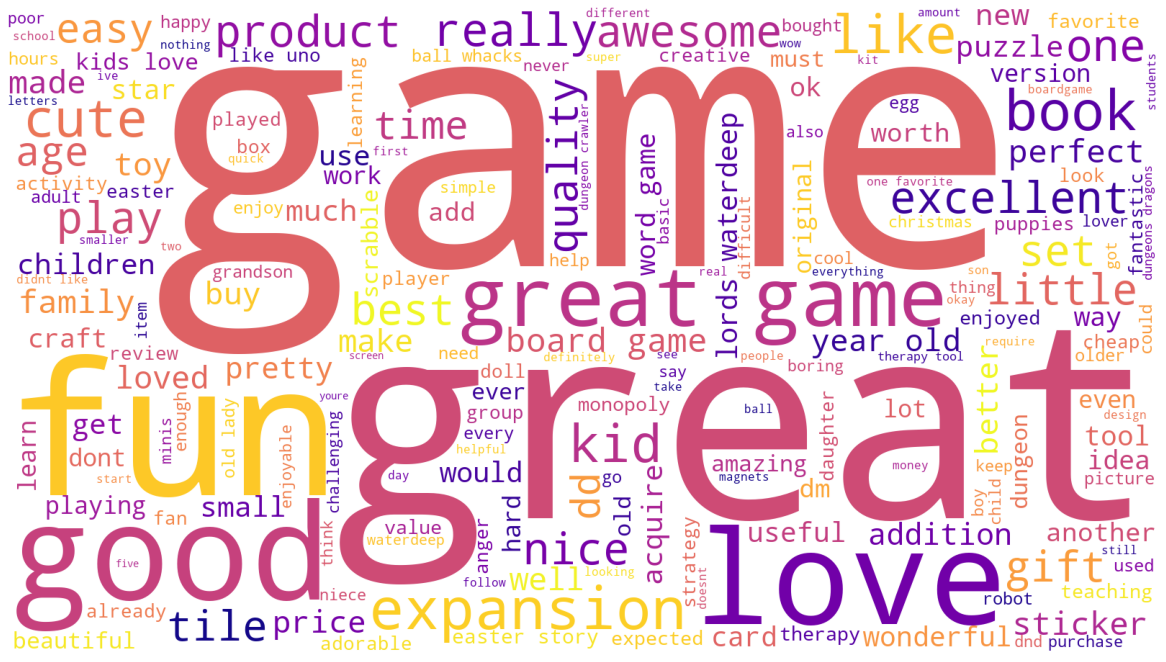

In [79]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_summary2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [119]:
# Determine the frequency of words in each column
# Generate a DataFrame from Counter.
review_counts = pd.DataFrame(Counter(filtered_review_tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word').reset_index()
review_counts.head()
# Determine the 15 most common words in Reviews
# Generate a DataFrame from Counter.
summary_counts = pd.DataFrame(Counter(filtered_summary_tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word').reset_index()
# Preview data.
counter_outerjoin = pd.concat([review_counts,summary_counts],axis = 1, join='outer')
#counter_innerjoin = pd.concat([review_counts,summary_counts],axis = 1, join='inner')
counter_outerjoin

,Word,Frequency,Word,Frequency
0,game,1359,game,268
1,one,475,great,236
2,play,442,fun,175
3,fun,407,good,84
4,great,391,love,70
5,like,373,like,54
6,get,293,kids,48
7,cards,281,book,42
8,tiles,280,expansion,42
9,really,278,cute,40


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [100]:
# Provided function.
def generate_polarity(entry):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(entry).sentiment[0]

In [131]:
# Determine polarity of both columns. 
# Populate a new column with polarity scores for each Review.
df6['Review_polarity'] = df6['Review'].apply(generate_polarity)
# Populate a new column with polarity scores for each Summary.
df6['Summary_polarity'] = df6['Summary'].apply(generate_polarity)
# Preview the result.
df6.head()

,Review,Summary,review_tokens,summary_tokens,Review_polarity,Summary_polarity
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.15
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.80
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.00
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.00
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.00


In [138]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(entry):
    return TextBlob(entry).sentiment[1]
# Populate a new column with subjectivity scores for each comment.
df6['Review_Subjectivity'] = df6['Review'].apply(generate_subjectivity)
# Populate a new column with polarity scores for each Summary.
df6['Summary_Subjectivity'] = df6['Summary'].apply(generate_subjectivity)
# Preview the result.
df6.head()

,Review,Summary,review_tokens,summary_tokens,Review_polarity,Summary_polarity,Review_Subjectivity,Summary_Subjectivity
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.15,0.486111,0.500000
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.80,0.442976,0.900000
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.00,0.430435,0.733333
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.00,0.784848,0.000000
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.00,0.316667,0.000000


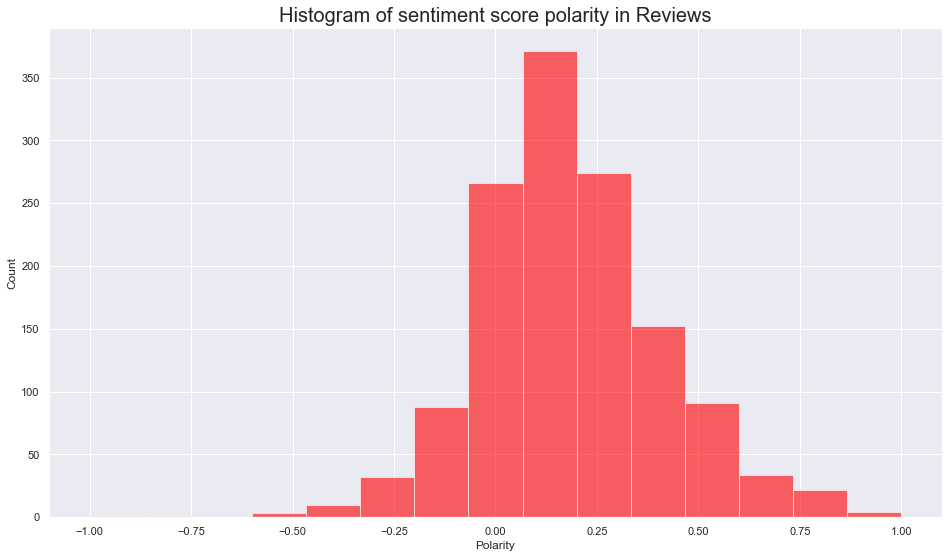

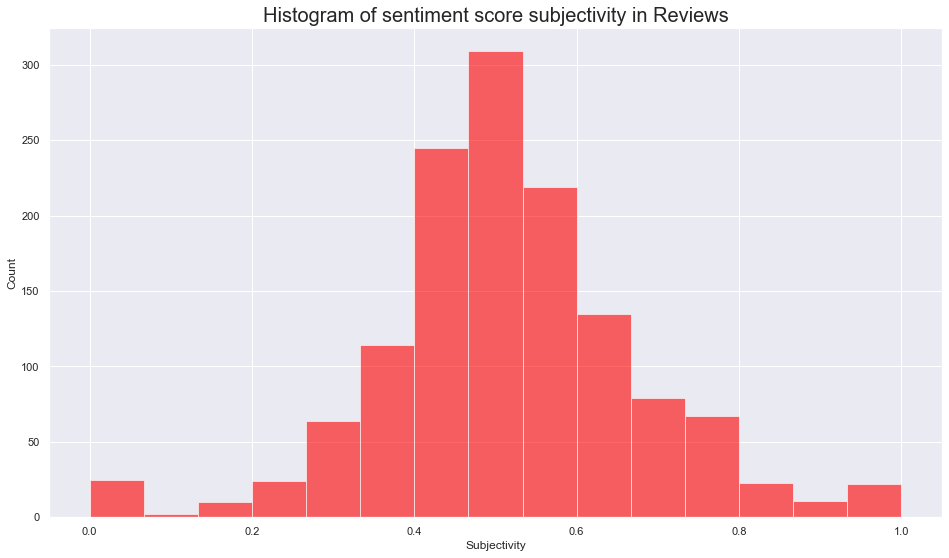

In [140]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins.
num_bins = 15
# Set the plot area.
plt.figure(figsize=(16,9))
# Define the bars.
n, bins, patches = plt.hist(df6['Review_polarity'], num_bins, facecolor='red', alpha=0.6)
# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity in Reviews', fontsize=20)
plt.show()
# Histogram of sentiment score
# Set the number of bins.
num_bins = 15
# Set the plot area.
plt.figure(figsize=(16,9))
# Define the bars.
n, bins, patches = plt.hist(df6['Review_Subjectivity'], num_bins, facecolor='red', alpha=0.6)
# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity in Reviews', fontsize=20)
plt.show()

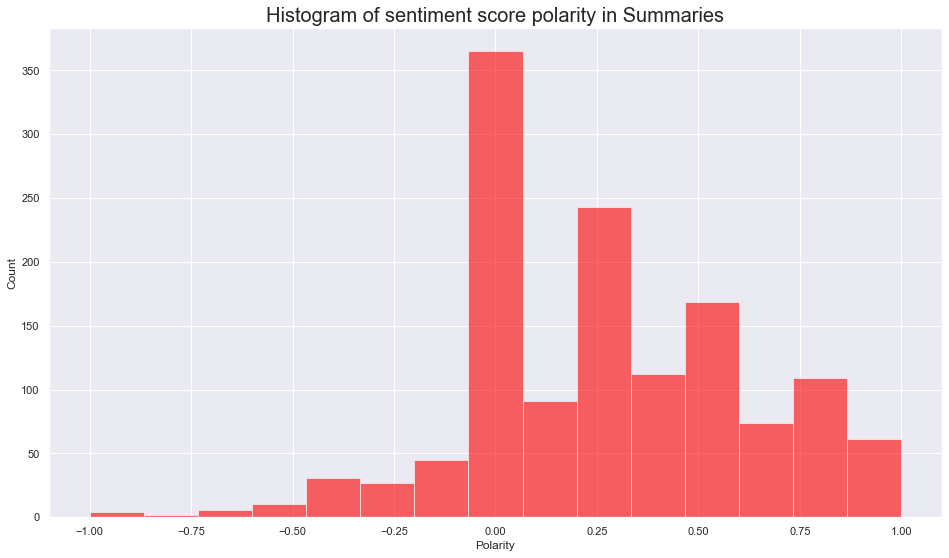

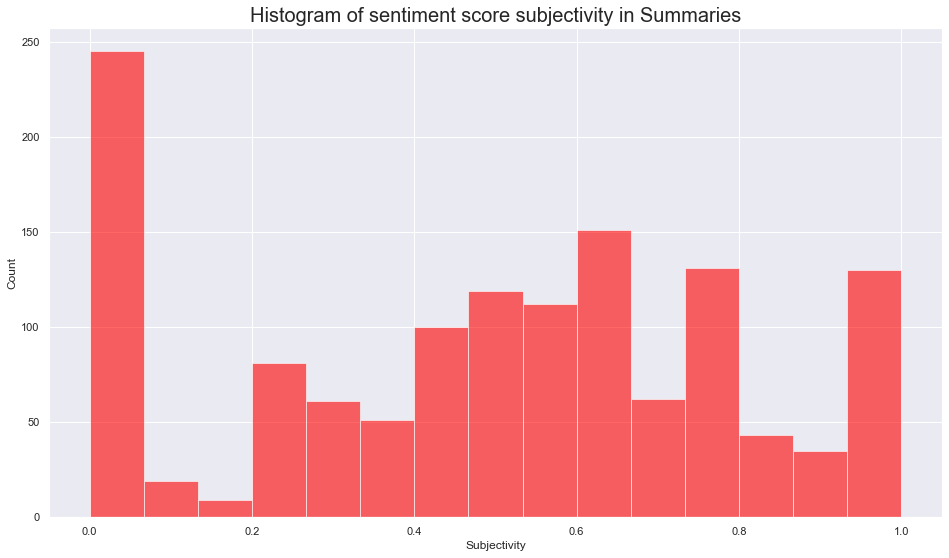

In [141]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins.
num_bins = 15
# Set the plot area.
plt.figure(figsize=(16,9))
# Define the bars.
n, bins, patches = plt.hist(df6['Summary_polarity'], num_bins, facecolor='red', alpha=0.6)
# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity in Summaries', fontsize=20)
plt.show()
# Histogram of sentiment score
# Set the number of bins.
num_bins = 15
# Set the plot area.
plt.figure(figsize=(16,9))
# Define the bars.
n, bins, patches = plt.hist(df6['Summary_Subjectivity'], num_bins, facecolor='red', alpha=0.6)
# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity in Summaries', fontsize=20)
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [156]:
# Top 20 positive reviews.
positive_reviews = df6.nlargest(20,'Review_polarity')
# Select relevant columns to view
positive_reviews = positive_reviews[['Review','Review_polarity']]
# Adjust the column width.
positive_reviews.style.set_properties(subset=['Review'], **{'width': '1200px'})
# View output.
positive_reviews

,Review,Review_polarity
564,perfect,1.000000
1080,my daughter loves her stickers awesome seller ...,1.000000
1334,perfect for tutoring my grandson in spelling,1.000000
890,the best part i see is the box what a wonderfu...,0.880000
498,great quality very cute and perfect for my tod...,0.816667
31,the pictures are great ive done one and gave ...,0.800000
336,great seller happy with my purchase 5 starrrr,0.800000
439,great easter gift for kids,0.800000
491,these are great,0.800000
692,bought this because i wanted it all these dd g...,0.800000


In [157]:
# Top 20 positive summaries.
positive_summaries = df6.nlargest(20,'Summary_polarity')
# Select relevant columns to view
positive_summaries = positive_summaries[['Summary','Summary_polarity']]
# View output.
positive_summaries

,Summary,Summary_polarity
5,best gm screen ever,1.0
23,wonderful designs,1.0
27,perfect,1.0
61,theyre the perfect size to keep in the car or ...,1.0
107,perfect for preschooler,1.0
112,awesome sticker activity for the price,1.0
132,awesome book,1.0
133,he was very happy with his gift,1.0
150,awesome,1.0
166,awesome and welldesigned for 9 year olds,1.0


In [158]:
# Top 20 negative reviews.
negative_reviews = df6.nsmallest(20,'Review_polarity')
# Select relevant columns to view
negative_reviews = negative_reviews[['Review','Review_polarity']]
# Adjust the column width.
negative_reviews.style.set_properties(subset=['Review'], **{'width': '1200px'})
# View output.
negative_reviews

,Review,Review_polarity
165,booo unles you are patient know how to measure...,-1.000000
147,incomplete kit very disappointing,-0.780000
267,one of my staff will be using this game soon s...,-0.550000
90,i bought this as a christmas gift for my grand...,-0.500000
141,i sent this product to my granddaughter the po...,-0.491667
251,my 8 yearold granddaughter and i were very fru...,-0.446250
382,i purchased this on the recommendation of two ...,-0.440741
312,this game although it appears to be like uno a...,-0.400000
355,my son loves playing this game it was recommen...,-0.400000
713,if you like me used to play dd but now you and...,-0.400000


In [162]:
# Top 20 negative summaries.
negative_summaries = df6.nsmallest(20,'Summary_polarity')
# Select relevant columns to view
negative_summaries = negative_summaries[['Summary','Summary_polarity']]
# Adjust the column width.
negative_summaries.style.set_properties(subset=['Summary'], **{'width': '1200px'})
# View output.
negative_summaries

,Summary,Summary_polarity
17,the worst value ive ever seen,-1.000000
165,boring unless you are a craft person which i am,-1.000000
587,boring,-1.000000
837,before this i hated running any rpg campaign d...,-0.900000
1,another worthless dungeon masters screen from ...,-0.800000
116,disappointed,-0.750000
266,promotes anger instead of teaching calming met...,-0.700000
634,too bad this is not what i was expecting,-0.700000
637,bad qualityall made of paper,-0.700000
144,at age 31 i found these very difficult to make,-0.650000


## 7. Discuss: Insights and observations

***Your observations here...***

# 